In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import filt_freq, RMS

Данные загружены


In [2]:
def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    #ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона


In [3]:
fs, data_0605_91_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0091S2.wav')
fs, data_0605_92_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0092S2.wav')
fs, data_0605_93_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0093S2.wav')
fs, data_0605_94_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0094S2.wav')
fs, data_0605_95_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0095S2.wav')
fs, data_0605_96_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0096S2.wav')
fs, data_0605_97_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0097S2.wav')
fs, data_0605_98_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0098S2.wav')
fs, data_0605_99_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0099S2.wav')
fs, data_0605_100_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0100S2.wav')
fs, data_0605_101_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0101S2.wav')
fs, data_0605_102_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0102S2.wav')
fs, data_0605_103_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0103S2.wav')

data_0605_2 = [data_0605_91_2, data_0605_92_2, data_0605_93_2, data_0605_94_2, data_0605_95_2, data_0605_96_2, data_0605_97_2, data_0605_98_2, data_0605_99_2, data_0605_100_2, data_0605_101_2, data_0605_102_2, data_0605_103_2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


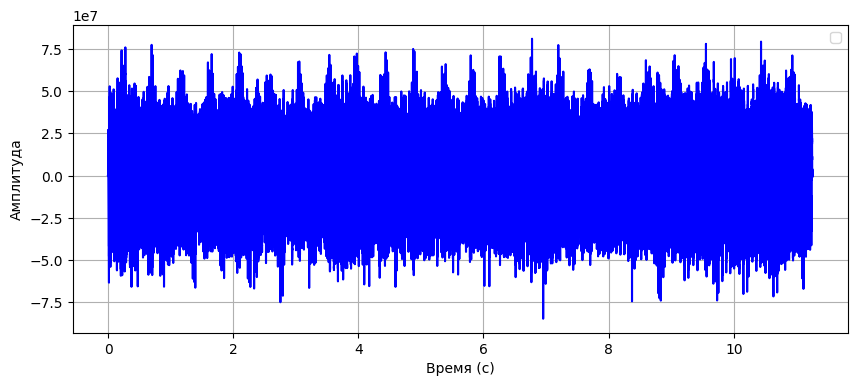

In [34]:
j = 6
t = np.arange(len(data_0605_2[j]))/fs
f = fftfreq(len(data_0605_2[j]), 1 / fs)
plt.figure(figsize=(10,4))
plt.plot(t, data_0605_2[j], color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [36]:
data_rotation = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    
    RMS_degrees = []

    for i in range(len(data_0605_2)):
        data_rotation_filt = ifft(filt_freq(fft(data_0605_2[i]), f1, f2, fs))
        RMS_value = RMS(data_rotation_filt, f1, f2, fs)
        RMS_degrees.append(RMS_value)

    data_rotation.append(RMS_degrees)

print("RMS_array", data_rotation)

# t_index = (t > 25) & (t < 63)
# t_rotation = t[t_index]
# data_rotation = data_0605_104_2[t_index]/max(data_0605_104_2[t_index])
# f_rotation = fftfreq(int(len(data_rotation)), 1 / fs)

# data_rotation_octaves = []
# for f1, f2 in zip(lower_bounds, upper_bounds):
#     data_rotation_filt_f = ifft(filt_freq(fft(data_rotation), f1, f2))
    
#     # Применяем преобразование Гильберта
#     analytic_signal = hilbert(np.real(data_rotation_filt_f))
#     envelope = np.abs(analytic_signal)  # Огибающая

#     data_rotation_octaves.append(envelope)

# data_rotation_octaves = np.array(data_rotation_octaves)

# data_rotation_filt = ifft(filt_freq(fft(data_rotation), 281, 355))

# f_ = fftfreq(int(len(data_rotation_filt )), 1 / fs)

# plt.figure(figsize=(10,4))
# plt.plot(t_rotation, data_rotation, color='blue')
# plt.legend()
# plt.xlabel("Время (с)")
# plt.ylabel("Амплитуда")
# plt.grid(True)
# plt.show()

RMS_array [[471618217.87738067, 330130874.40268487, 321899055.2561962, 335005446.1264413, 359214164.8242744, 356934735.7304282, 332397802.5729121, 335838332.73632884, 338456292.81652325, 347034262.5148526, 361101150.968171, 337993625.96374834, 316985890.3194053], [978186909.6609657, 538839249.1736934, 424968567.42802906, 352918763.0454262, 325680316.03694123, 317773377.1108362, 328719726.78501236, 329241774.71143407, 365287126.3071269, 392761511.66791403, 395823299.9846779, 383394977.9286888, 361340413.63243324], [468242056.11788845, 292932986.3648842, 244993328.34505656, 233429171.79747257, 254742739.5482425, 262792086.60153824, 211143769.98029575, 238569146.9307121, 271220184.29643047, 302437317.1912058, 329640569.9770977, 365986770.03407127, 345156679.4154426], [1133546332.1772609, 682582587.1832622, 629747212.2902567, 661062232.5940313, 690894256.6820282, 673700260.7977552, 612764856.6994765, 607008325.8695728, 475332279.0556017, 549733979.1486515, 544723002.3148723, 625961737.8515

In [ ]:
j = 10
amplitude = []
for i in range(len(data_rotation)):
    original_array = np.array(data_rotation[i])  # Исходный массив
    original_array = original_array/max(original_array)  # Нормируем массив
    reversed_array = original_array[::-1]  # Создаем обратную копию массива
    result_array = np.concatenate((original_array, reversed_array))
    analytic_signal = hilbert(np.real(result_array))
    envelope = np.abs(analytic_signal)  # Огибающая
    amplitude.append(envelope)
    
angles = np.linspace(0, 2 * np.pi, len(amplitude[0]))  # Углы в радианах
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, np.abs(amplitude[10]), linewidth=2, label = "800 Гц")
ax.plot(angles, np.abs(amplitude[11]), linewidth=2, label = "1000 Гц")
ax.plot(angles, np.abs(amplitude[12]), linewidth=2, label = "1250 Гц")
ax.plot(angles, np.abs(amplitude[13]), linewidth=2, label = "1600 Гц")  
ax.plot(angles, np.abs(amplitude[14]), linewidth=2, label = "2000 Гц")
  
ax.set_title("Диаграмма направленности датчика")
plt.legend()
plt.show()

In [3]:
amp_standard_23 = np.array([55, 53, 53, 54, 55, 55, 57, 58, 59, 58, 59 ,60, 61, 62, 61, 60, 60, 60, 59, 58, 55, 54])
amp_standard_self = np.array([12.5, 12, 11, 10, 9, 8.5, 7.5, 6.5, 5, 4.5, 4, 4.5, 3.5, 3, 3, 3, 2.5, 2.5, 2.5, 2, 2, 1])

fs, data_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0039S1.wav')
fs, data_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0039S2.wav')

fs, data_calibrated = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0038S1.wav')
fs, data_calibrated_pgd = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0038S2.wav')

fs, data_105_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0105S1.wav')

fs, data_105_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0105S2.wav')

fs, data_107_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0107S1.wav')
fs, data_107_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0107S2.wav')

fs, data_84_1 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0084S1.wav')
fs, data_84_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0084S2.wav')

In [119]:
signal = data_calibrated_pgd
start_time=54
end_time=62
start_index = int(start_time * fs)
end_index = int(end_time * fs)
N = len(signal[start_index:end_index])
trimmed_signal = signal[start_index:end_index]
rms = np.sqrt(np.sum(np.abs(trimmed_signal) ^ 2)) / np.sqrt(2)
print(f"RMS: {rms:.6f}")

RMS: 6055833.004252


In [ ]:
def sinus(x):
    return np.sin(x)

x = np.linspace(0, 2 * np.pi, 10000)
y = sinus(x) * 1e8

data = data_calibrated_pgd
t = np.arange(len(data))/fs
 
t_index = (t > 54) & (t < 62)
t_rotation = t[t_index]

data_calibrated_ = data_calibrated[t_index]


N = len(data_calibrated_)
abs = np.abs(data_calibrated_)
energy = np.sqrt(np.sum(np.abs(data_calibrated_) ^ 2) / N) * np.sqrt(2) 

print("ampl_calibr", energy)

ampl_calibr 10766.465065516622


In [74]:
np.sum(np.abs(data_calibrated_) ^ 2) / N

57958387.00349491

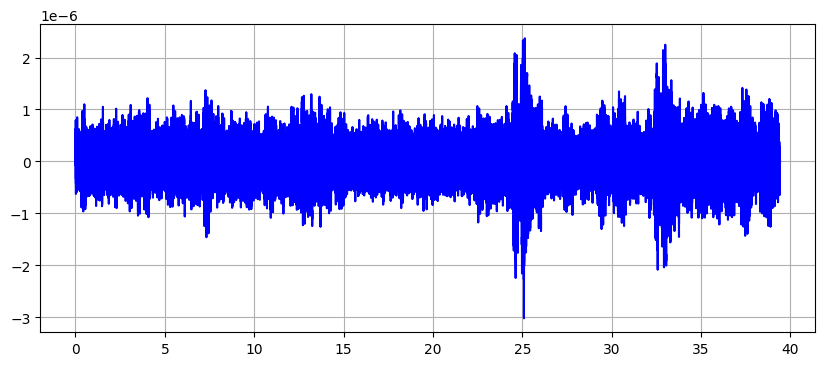

In [7]:
t = np.arange(len(data_2))/fs
plt.figure(figsize=(10,4))  
plt.plot(t, data_2, color='blue', label = "Калибровка")

plt.grid(True)

Оценить среднее значение амплитуды синуса, и получая коэффициент на который делим все значения и умножаем на 100 и получаем мВ

In [ ]:
# koefficient = 100 / 6.77e7
# koefficient_pgd = 100 / 8.3e8
# data_calibrated = np.array(data_calibrated) * koefficient
# data_1 = data_1 * koefficient
# data_84_1 = data_84_1 * koefficient
# data_105_1 = data_105_1 * koefficient


# data_2 = data_2 * koefficient_pgd
# data_84_2 = data_84_2 * koefficient_pgd
# data_105_2 = data_105_2 * koefficient_pgd
# data_107_2 = data_107_2 * koefficient_pgd
# data_calibrated_pgd = data_calibrated_pgd * koefficient_pgd


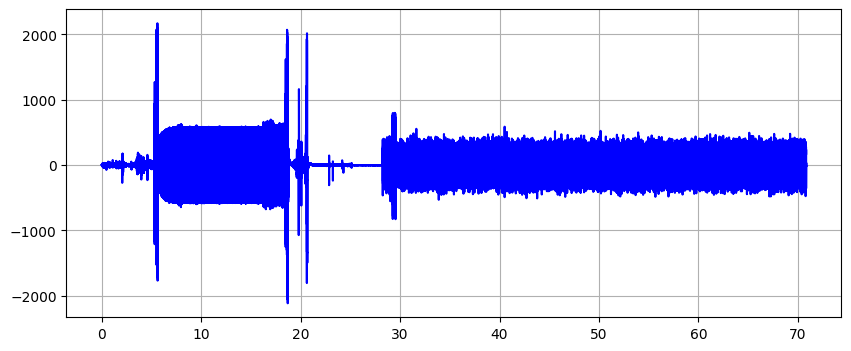

In [8]:
t = np.arange(len(data_calibrated))/fs
plt.figure(figsize=(10,4))
plt.plot(t, data_calibrated, color='blue', label = "Калибровка")
plt.grid(True)


In [42]:
t = np.arange(len(data_calibrated))/fs

t_index = (t > 8) & (t < 15)
t_rotation = t[t_index]
f_rotation = fftfreq(int(len(data_calibrated)), 1 / fs)

data_calibrated_ = data_calibrated[t_index]
data_calibrated_filt = ifft(filt_freq(fft(data_calibrated_), 995, 1005, fs))

In [43]:
data_calibrated_norm = data_calibrated_ * 1.5e-6

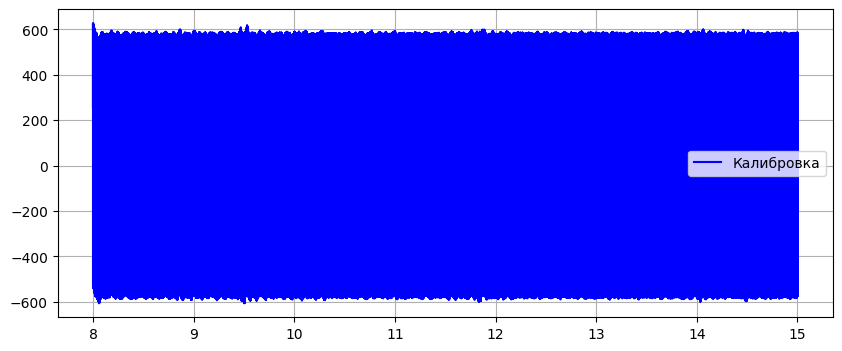

In [44]:
plt.figure(figsize=(10,4))
plt.plot(t_rotation, data_calibrated_norm, color='blue', label = "Калибровка")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def sinus(x):
    return np.sin(x)

x = np.linspace(0, 2 * np.pi, 10000)
y = sinus(x)

N = len(y)
energy = np.sqrt(np.sum(np.abs(y) ** 2) / N) * np.sqrt(2) # Сумма квадратов модуля амплитуд

y_fft = fft(y)  # Преобразование Фурье
energy_fft = np.sqrt(np.sum(np.abs(y_fft) ** 2) / N)  # Сумма квадратов модуля амплитуд в частотной области
print("Энергия в временной области:", energy)
print("Энергия в частотной области:", energy_fft)

Энергия в временной области: 2.9998499962498126
Энергия в частотной области: 212.1214274890682


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


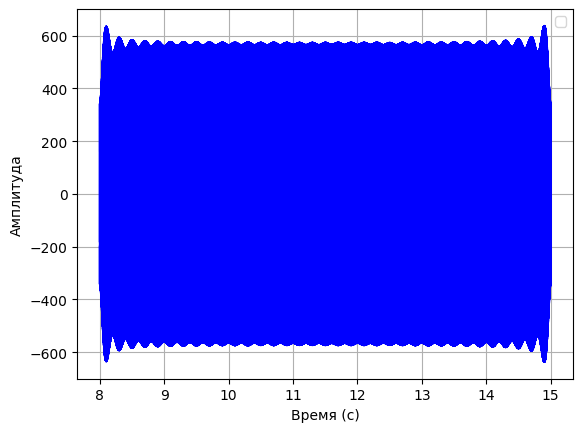

In [29]:
t_calibrated = np.arange(len(data))/fs
plt.plot(t_rotation, data_calibrated_filt, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [ ]:
# ampl_calibr = RMS(data_calibrated_filt)
# N = len(data_calibrated_filt)
# ampl_calibr = np.sqrt(np.sum(np.abs(data_calibrated_filt) ** 2) / N) * np.sqrt(2)  # Сумма квадратов модуля амплитуд
# k = 2e-5 * 10**((94-70)/20) / ampl_calibr
# print(k, ampl_calibr)

5.582343426220418e-07 567.8236079195082


In [7]:
data_1_calibrated = data_1 / k 

amplitudes_microphone = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_1_filt = ifft(filt_freq(fft(data_1_calibrated), f1, f2, fs))
    amp = RMS(data_1_filt)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_2_filt = ifft(filt_freq(fft(data_2), f1, f2, fs))
    amp = RMS(data_2_filt)
    amplitudes_PGD.append(amp)


amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)

l_39 = amplitudes_microphone / amplitudes_PGD


In [4]:
data_84_1_calibrated = data_84_1
#data_84_1_calibrated = data_84_1 / k
t = np.arange(len(data_84_1_calibrated))/fs


t_index = (t > 15) & (t < 20)
t_rotation = t[t_index]

data_84_1_calibrated = data_84_1_calibrated[t_index]

data_84_2 = data_84_2[t_index]

amplitudes_data_84_1 = []
amplitudes_data_84_2 = []

amplitudes_microphone = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_84_1_filt = ifft(filt_freq(fft(data_84_1_calibrated), f1, f2, fs))
    amplitudes_data_84_1.append(data_84_1_filt)
    amp = RMS(data_84_1_filt)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_84_2_filt = ifft(filt_freq(fft(data_84_2), f1, f2, fs))
    amplitudes_data_84_2.append(data_84_2_filt)
    amp = RMS(data_84_2_filt)
    amplitudes_PGD.append(amp)


amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)

l_84 = amplitudes_microphone / amplitudes_PGD


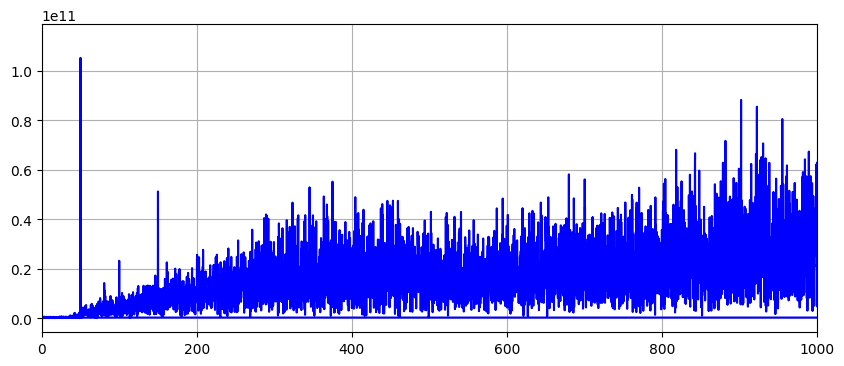

In [41]:
data = data_84_1_calibrated

t = np.arange(len(data_calibrated))/fs
f = fftfreq(len(data), 1 / fs)
plt.figure(figsize=(10,4))
plt.plot(f, np.abs(fft(data)), color='blue', label = "Калибровка")
plt.xlim(0, 1000)
plt.grid(True)


In [5]:
amplitudes_data_84_1_norm = np.array(amplitudes_data_84_1) * 1.5e-6
amplitudes_data_84_2_norm = np.array(amplitudes_data_84_2) * 1.2e-7

In [45]:
amplitudes_data_84_1_norm = np.array(amplitudes_data_84_1_norm) * 5.6e-7

In [ ]:
N = len(data_calibrated_)
energy = np.sqrt(np.sum(np.abs(data_calibrated_) ^ 2) / N) * np.sqrt(2) 

In [25]:
a = np.std(amplitudes_data_84_1_norm[8])
print(a)

4.570520211098826


In [26]:
a = np.std(amplitudes_data_84_1_norm[11])
print(a)

9.682642548863788


In [ ]:
N = len(data_calibrated_)
abs = np.abs(data_calibrated_)
energy = np.sqrt(np.sum(np.abs(data_calibrated_) ^ 2) / N) * np.sqrt(2) 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


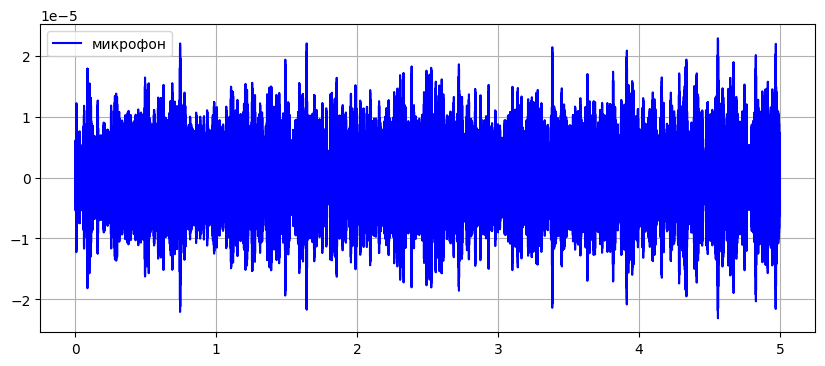

In [46]:
data = amplitudes_data_84_1_norm
t = np.arange(len(data[11]))/fs
plt.figure(figsize=(10,4))  
plt.plot(t, data[11], color='blue', label = "микрофон")
plt.legend()
plt.grid(True)
plt.show()



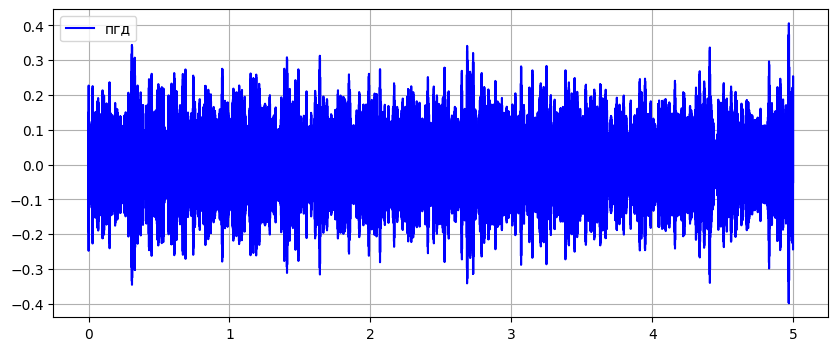

In [7]:
data = amplitudes_data_84_2_norm
t = np.arange(len(data[11]))/fs
plt.figure(figsize=(10,4))  
plt.plot(t, data[11], color='blue', label = "пгд")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
def Nd(w):
    c = 340
    k = w/c
    H = 183e-3
    return(np.sin(k*H/2)/np.sin(0.5))

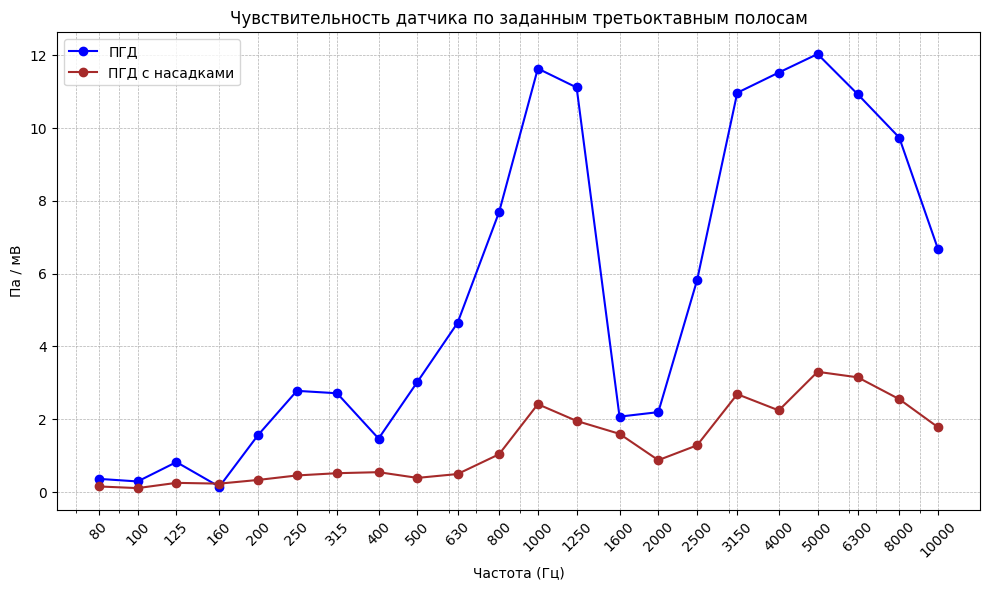

In [74]:
frequensis = np.linspace(80, 10000, 1000)
theoretical = Nd(2 * np.pi * frequensis)

plt.figure(figsize=(10, 6))
plt.semilogx(center_freqs, l_39, marker='o', color='blue', label='ПГД')
plt.semilogx(center_freqs, l_84, marker='o', color='brown', label='ПГД с насадками')
# plt.semilogx(frequensis, np.abs(theoretical)/1e13/2, marker = '.', color='red', label='Теоретическая')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Частота (Гц)')
plt.ylabel('Па / мВ')
plt.title('Чувствительность датчика по заданным третьоктавным полосам')
plt.xticks(center_freqs, [f"{int(f)}" for f in center_freqs], rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [13]:
l = np.array([150, 200, 250, 300, 350, 400])
signal_db = np.array([88, 81, 77, 75, 73, 72])
signal_pa = 2e-5 * 10**(signal_db / 20)
l_0 = 110
l_norm = l - l_0

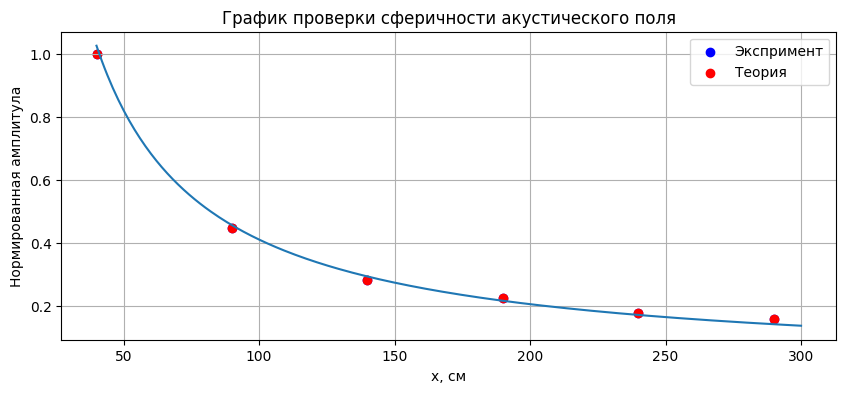

In [29]:
x = np.linspace(40, 300, 260)
signal_pa_norm = signal_pa/np.max(signal_pa)
plt.figure(figsize=(10,4))
plt.scatter(l_norm, signal_pa_norm, label = 'Экспримент', color = 'blue')

def func (x):
    return 41/x

plt.scatter(l_norm, signal_pa_norm, label = "Теория", color = 'red')
plt.plot(x, func(x))
plt.grid(True)
plt.xlabel("x, см")
plt.ylabel("Нормированная амплитула")
plt.title("График проверки сферичности акустического поля")
plt.legend()
plt.show()